In [27]:
import numpy as np
import pandas as pd

X_train_i = np.load('Xtrain_Regression_Part1.npy')
Y_train_i = np.load('Ytrain_Regression_Part1.npy')

X_test_i = np.load('Xtest_Regression_Part1.npy')


#print(X_train_i.shape) # (100, 20)
#print(Y_train_i.shape) # (100, 1)
#print(X_test_i.shape)  # (1000, 20)

In [28]:
def polynomial_fit(x,y,P):
    A = np.zeros((len(x),P+1))  # Initializes the A matrix, corresponding to the matrix form of the normal equations
    
    for i in range(P+1):
        for k in range(len(x)):  # Brute-force nested for loops to fill the matrix
            A[k,i] = x[k]**i
    
    At = np.transpose(A)
    B = np.dot(At,y)
    Coef = np.dot(np.linalg.inv(np.dot(At,A)),B)  # The coefficients are computed by solving the system
    
    return np.round(Coef,3)  # Rounds the coefficients

In [32]:
X_train = X_train_i[:,0]  # Convert the data to a proper format
print(X_train.shape)
print(X_train_i.shape)

Y_train = Y_train_i[:,0]
print(Y_train.shape);
print(Y_train_i.shape)


(100,)
(100, 20)
(100,)
(100, 1)


In [35]:
c = polynomial_fit(X_train, Y_train, 1) # Apply the polynomial fit and print the coefficients. Left: B0
print(c)

[-0.039  0.167]


In [37]:
def SSE_linear(x,y,coef):
    prediction = np.zeros(len(y));    # This function computes the SSE, receiving the data arrays and the previously obtained
                                       # coefficients as arguments    
    for i in range(len(y)):
        prediction[i] = coef[1]*x[i] + coef[0];
    
    SSE = np.sum((y-prediction)**2);
    
    print("Coefficients: B0 = ",coef[0]," B1 = ",coef[1]);
    print("SSE = ", np.round(SSE,3));
    
    return prediction;

In [39]:
res = SSE_linear(X_train, Y_train, c)

Coefficients: B0 =  -0.039  B1 =  0.167
SSE =  1513.038


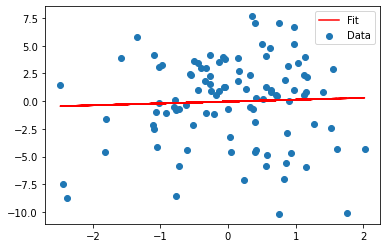

In [42]:
import matplotlib.pyplot as plt

plt.scatter(X_train, Y_train, label='Data'); # Plot both the data and the fit on the same graph
plt.plot(X_train, res, 'r', label='Fit');
plt.legend();